In [ ]:
import pandas as pd

#Load the dataset into a pandas dataframe.
df = pd.read_csv("hg003_bcf_gatk.csv", low_memory=False)
df = df[1:]
print('summary: ', df.groupby('FILTER').size())



df = df.sample(2000000, random_state=42)

print('summary: ', df.groupby('FILTER').size())


summary:  FILTER
0    7383616
1    1673185
dtype: int64
summary:  FILTER
0    1630866
1     369134
dtype: int64


In [ ]:

# Assuming you have a DataFrame called 'df' with columns 'col1', 'col2', 'col3', and 'col_to_exclude'

# Get all column names except the one to exclude
columns_to_merge = [col for col in df.columns if col != 'FILTER']

# Define a lambda function to merge the values of selected columns
merge_columns = lambda row: ' '.join(str(row[col]) for col in columns_to_merge)

# Merge columns using the defined function
df['merged_column'] = df.apply(merge_columns, axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_merge)

# Print the resulting DataFrame
print(df.sample(10))


        FILTER                                      merged_column
2984272      0  54.3148 DP=7;VDB=0.862672;RPBZ=-0.353553;MQBZ=...
26225        1  14.4232 DP=8;VDB=0.48;RPBZ=1.3495;MQBZ=1.3495;...
574476       0  225.417 DP=16;VDB=0.212649;FS=0.0;SGB=-0.68946...
4948648      1  133.6 AC=1;AF=0.5;AN=2;BaseQRankSum=0.224;DP=1...
5611516      1  40.6 AC=1;AF=0.5;AN=2;BaseQRankSum=0.749;DP=14...
163926       0  113.26 DP=7;VDB=0.572009;RPBZ=-1.52753;BQBZ=-1...
7479052      1  52.6 AC=1;AF=0.5;AN=2;BaseQRankSum=-0.842;DP=1...
3656836      0  192.684 INDEL;IDV=16;IMF=1.0;DP=16;VDB=0.33182...
6142287      0  132.64 AC=1;AF=0.5;AN=2;BaseQRankSum=0.524;DP=...
8119883      0  315.96 AC=2;AF=1.0;AN=2;BaseQRankSum=1.593;DP=...


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.merged_column.values
labels = df.FILTER.values

In [ ]:
import numpy as np
labels = labels.astype(np.int64)

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install transformers

In [ ]:
!tail -26 unique_word.txt > ww.txt

In [ ]:
#save words that can not be split
ww = open('ww.txt')
never_split = ww.readlines()
res = []
for sub in never_split:
    res.append(sub.replace("\n", ""))
res

['indel',
 'idv',
 'imf',
 'dp',
 'vdb',
 'rpbz',
 'mqbz',
 'bqbz',
 'mqsbz',
 'scbz',
 'fs',
 'sgb',
 'mq0f',
 'dp4',
 'mq',
 'baseqranksum',
 'excesshet',
 'inbreedingcoeff',
 'mleac',
 'mleaf',
 'mqranksum',
 'qd',
 'readposranksum',
 'sor',
 'gq',
 'lowqual']

In [ ]:
#tokens and transformers structure

from transformers import BertConfig, BertModel, BertTokenizer,  BertForSequenceClassification

tokenizer = BertTokenizer("unique_word.txt", do_lower_case = True,
                          do_basic_tokenize = True, never_split = res,
                          unk_token = '[UNK]', sep_token = '[SEP]', pad_token = '[PAD]',
                          cls_token = '[CLS]', mask_token = '[MASK]',
                          tokenize_chinese_chars = False, strip_accents = None)
config = BertConfig(vocab_size = len(tokenizer), hidden_size = 256,
                           num_hidden_layers = 8, num_attention_heads = 8,
                           intermediate_size = 512, hidden_act = 'gelu',
                           hidden_dropout_prob = 0.1, attention_probs_dropout_prob = 0.1,
                           max_position_embeddings = 256,
                           initializer_range = 0.02, layer_norm_eps = 1e-12,
                           pad_token_id = 0, position_embedding_type = 'absolute',
                           use_cache = False, classifier_dropout = 0.1, num_labels=2,
                           output_attentions = False, # Whether the model returns attentions weights.
                           output_hidden_states = False, # Whether the model returns all hidden-states.
)
model =  BertForSequenceClassification(config)


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  30.4183 DP=2;FS=0.0;SGB=-0.379885;MQ0F=0.0;AC=2;AN=2;DP4=0,0,0,1;MQ=60 GT:PL 1/1:60,3,0
Tokenized:  ['30', '.', '41', '##8', '##3', 'dp', '=', '2', ';', 'fs', '=', '0', '.', '0', ';', 'sgb', '=', '-', '0', '.', '37', '##9', '##8', '##85', ';', 'mq0f', '=', '0', '.', '0', ';', 'ac', '=', '2', ';', 'an', '=', '2', ';', 'dp4', '=', '0', ',', '0', ',', '0', ',', '1', ';', 'mq', '=', '60', 'gt', ':', 'pl', '1', '/', '1', ':', '60', ',', '3', ',', '0']
Token IDs:  [2382, 1012, 4601, 2620, 2509, 30525, 1027, 1016, 1025, 30532, 1027, 1014, 1012, 1014, 1025, 30533, 1027, 1011, 1014, 1012, 4261, 2683, 2620, 27531, 1025, 30534, 1027, 1014, 1012, 1014, 1025, 9353, 1027, 1016, 1025, 2019, 1027, 1016, 1025, 30535, 1027, 1014, 1010, 1014, 1010, 1014, 1010, 1015, 1025, 30536, 1027, 3438, 14181, 1024, 20228, 1015, 1013, 1015, 1024, 3438, 1010, 1017, 1010, 1014]


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  30.4183 DP=2;FS=0.0;SGB=-0.379885;MQ0F=0.0;AC=2;AN=2;DP4=0,0,0,1;MQ=60 GT:PL 1/1:60,3,0
Token IDs: [101, 2382, 1012, 4601, 2620, 2509, 30525, 1027, 1016, 1025, 30532, 1027, 1014, 1012, 1014, 1025, 30533, 1027, 1011, 1014, 1012, 4261, 2683, 2620, 27531, 1025, 30534, 1027, 1014, 1012, 1014, 1025, 9353, 1027, 1016, 1025, 2019, 1027, 1016, 1025, 30535, 1027, 1014, 1010, 1014, 1010, 1014, 1010, 1015, 1025, 30536, 1027, 3438, 14181, 1024, 20228, 1015, 1013, 1015, 1024, 3438, 1010, 1017, 1010, 1014, 102]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  148


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
# Set the maximum sequence length.
# I've chosen 150 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length
MAX_LEN = 150

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 150 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 80% for training and 20% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=42, test_size=0.4)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.4)

In [ ]:
import tensorflow as tf
import torch
import numpy as np


# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32, but we have different data

batch_size = 1300

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30548, 256, padding_idx=0)
      (position_embeddings): Embedding(256, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-7): 8 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, e

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 137 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30548, 256)
bert.embeddings.position_embeddings.weight                (256, 256)
bert.embeddings.token_type_embeddings.weight                (2, 256)
bert.embeddings.LayerNorm.weight                              (256,)
bert.embeddings.LayerNorm.bias                                (256,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (256, 256)
bert.encoder.layer.0.attention.self.query.bias                (256,)
bert.encoder.layer.0.attention.self.key.weight            (256, 256)
bert.encoder.layer.0.attention.self.key.bias                  (256,)
bert.encoder.layer.0.attention.self.value.weight          (256, 256)
bert.encoder.layer.0.attention.self.value.bias                (256,)
bert.encoder.layer.0.attention.output.dense.weight        (256, 256)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 21

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))



======== Epoch 1 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:19.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:52.
  Batch   400  of    924.    Elapsed: 0:05:08.
  Batch   500  of    924.    Elapsed: 0:06:26.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:57.
  Batch   800  of    924.    Elapsed: 0:10:13.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.36184
  Training epcoh took: 0:11:48

Running Validation...
Confusion Matrix:
[[623503  29292]
 [ 71207  75998]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93    652795
           1       0.72      0.52      0.60    147205

    accuracy                           0.87    800000
   macro avg       0.81      0.74      0.76    800000
weighted avg       0.87      0.87      0.87    800000

Accuracy score:
0.87437625
Weighted preci

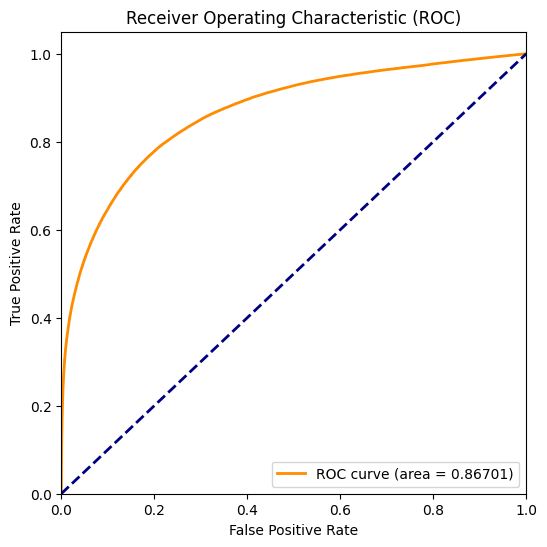


======== Epoch 2 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:14.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.30989
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[624803  27992]
 [ 66361  80844]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93    652795
           1       0.74      0.55      0.63    147205

    accuracy                           0.88    800000
   macro avg       0.82      0.75      0.78    800000
weighted avg       0.87      0.88      0.87    800000

Accuracy score:
0.88205875
Weighted preci

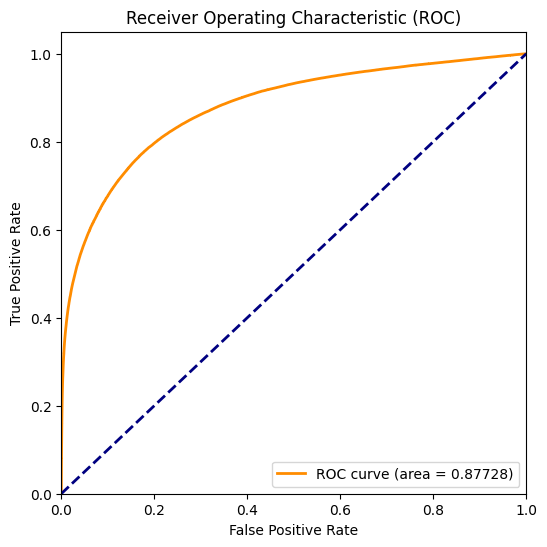


======== Epoch 3 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.30083
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[629852  22943]
 [ 68283  78922]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93    652795
           1       0.77      0.54      0.63    147205

    accuracy                           0.89    800000
   macro avg       0.84      0.75      0.78    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.8859675
Weighted precis

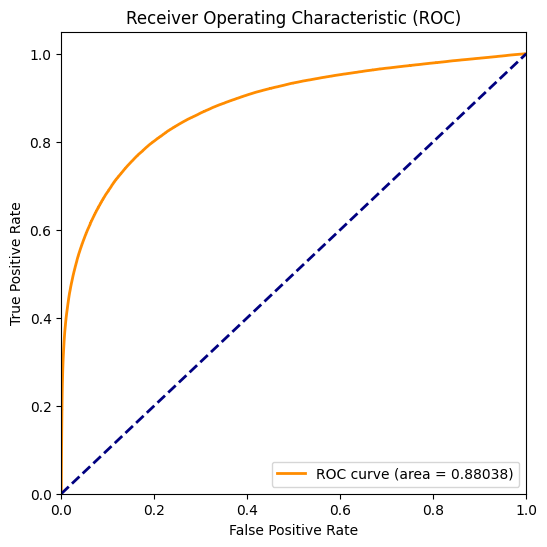


======== Epoch 4 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.29572
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[633230  19565]
 [ 70057  77148]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    652795
           1       0.80      0.52      0.63    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.75      0.78    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.8879725
Weighted precis

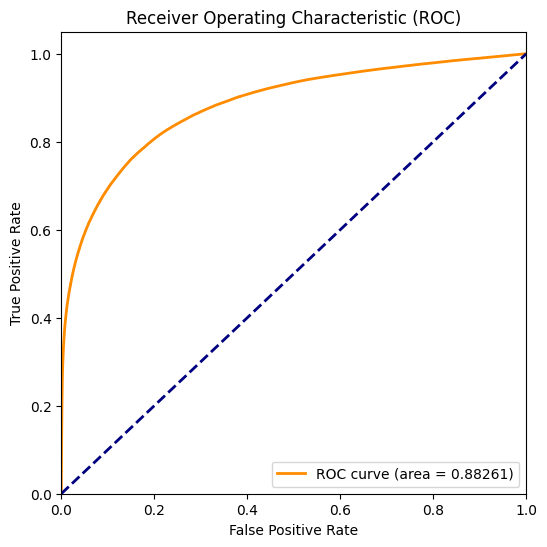


======== Epoch 5 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.29273
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[633125  19670]
 [ 69283  77922]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    652795
           1       0.80      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.75      0.79    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.88880875
Weighted preci

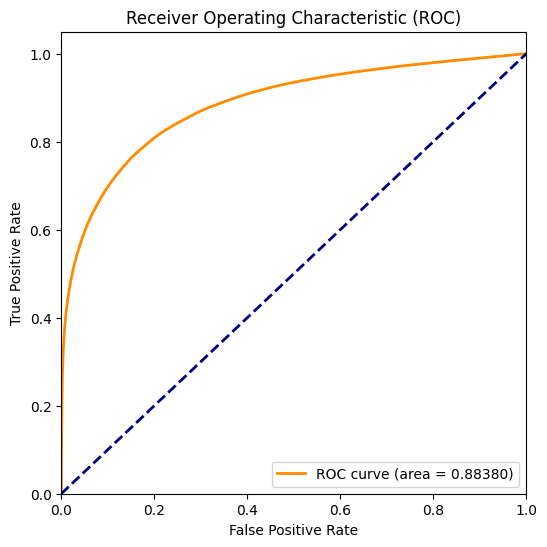


======== Epoch 6 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.29054
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[636010  16785]
 [ 71522  75683]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.51      0.63    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.74      0.78    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.88961625
Weighted preci

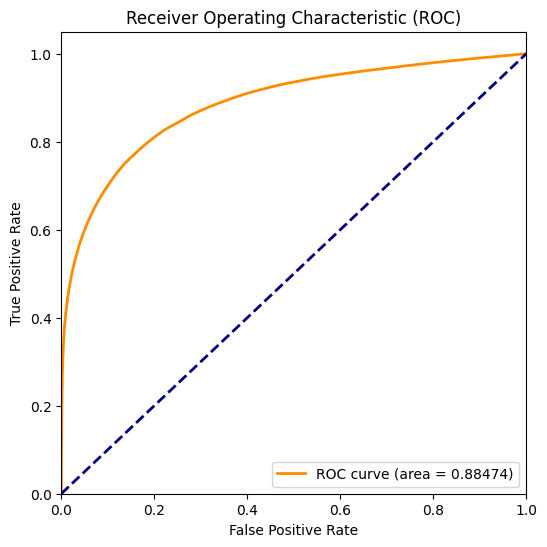


======== Epoch 7 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28881
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[631941  20854]
 [ 67200  80005]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    652795
           1       0.79      0.54      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.76      0.79    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.8899325
Weighted precis

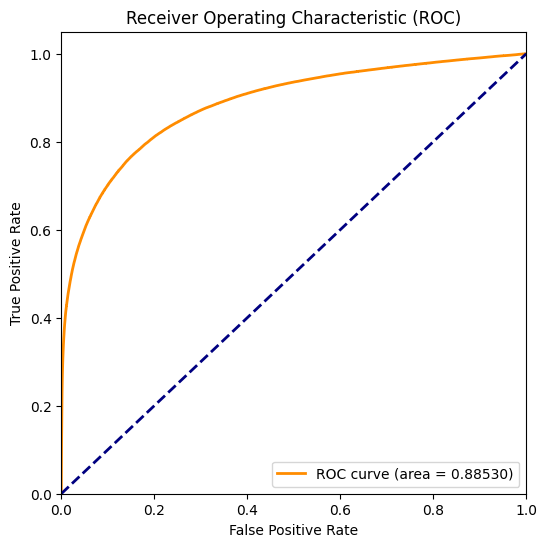


======== Epoch 8 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28728
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[633098  19697]
 [ 67831  79374]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.80      0.54      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.75      0.79    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.89059
Weighted precisio

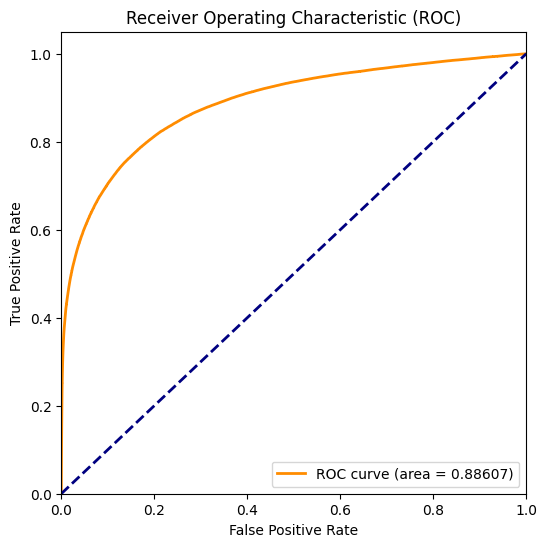


======== Epoch 9 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28605
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[634965  17830]
 [ 69295  77910]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.81      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89109375
Weighted preci

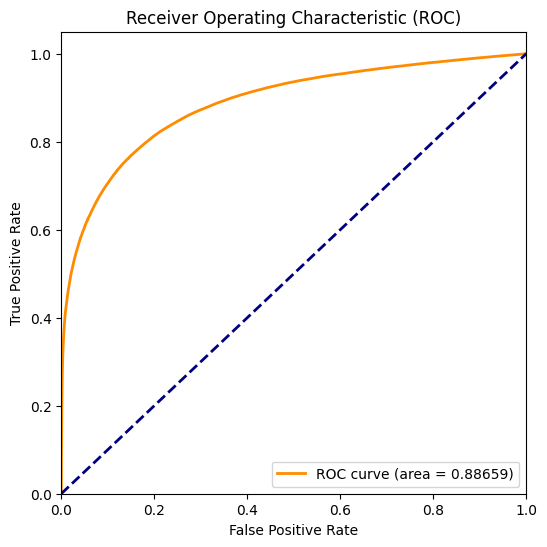


======== Epoch 10 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28513
  Training epcoh took: 0:11:48

Running Validation...
Confusion Matrix:
[[631522  21273]
 [ 65847  81358]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    652795
           1       0.79      0.55      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.76      0.79    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.8911
Weighted precisio

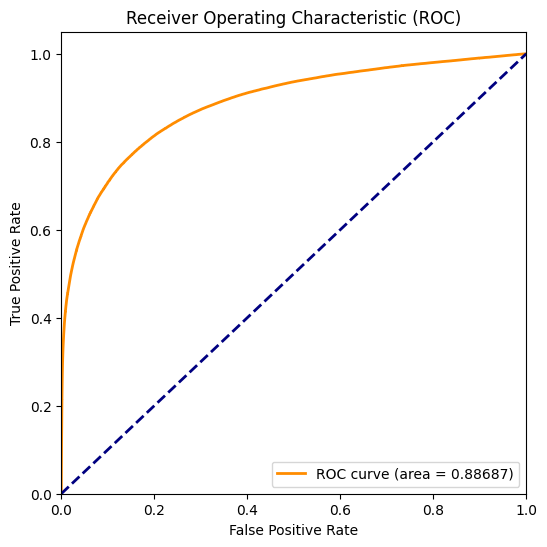


======== Epoch 11 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28417
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[635084  17711]
 [ 68881  78324]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89176
Weighted precisi

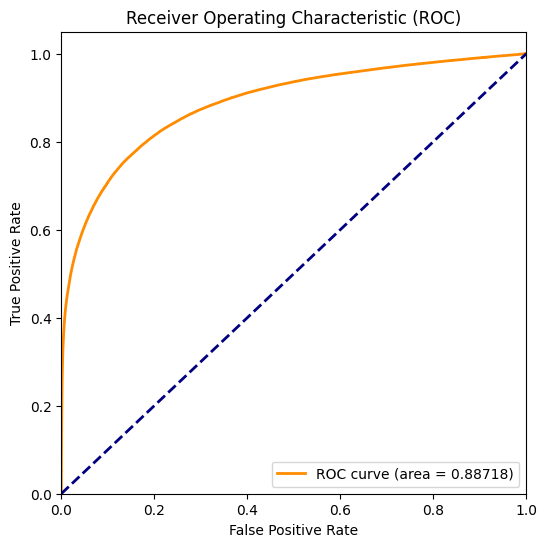


======== Epoch 12 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28342
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[631488  21307]
 [ 65674  81531]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    652795
           1       0.79      0.55      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.76      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89127375
Weighted prec

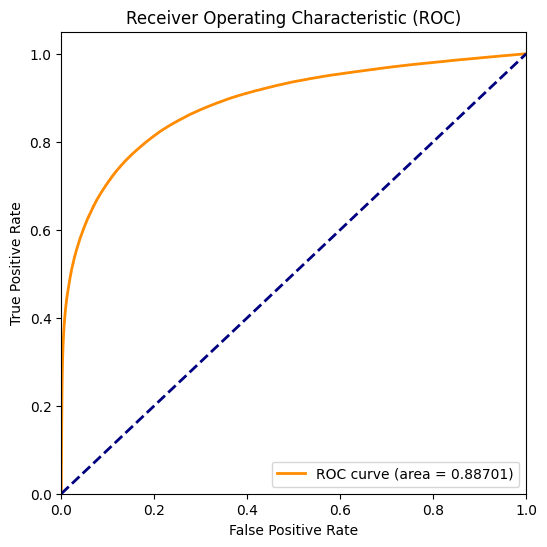


======== Epoch 13 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:54.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28267
  Training epcoh took: 0:11:48

Running Validation...
Confusion Matrix:
[[636204  16591]
 [ 69768  77437]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89205125
Weighted prec

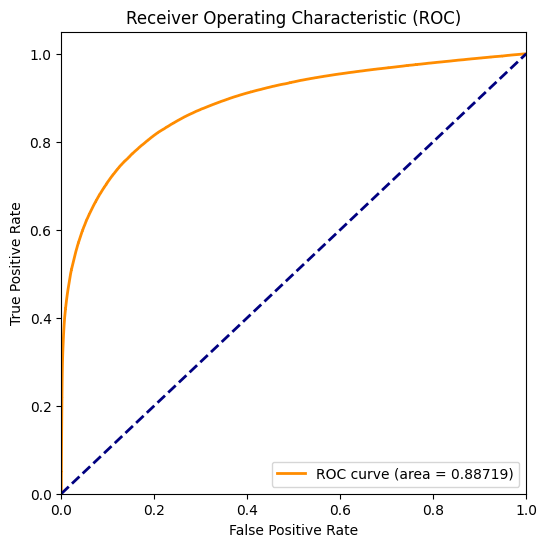


======== Epoch 14 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:54.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28193
  Training epcoh took: 0:11:45

Running Validation...
Confusion Matrix:
[[634820  17975]
 [ 68457  78748]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.81      0.53      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89196
Weighted precisi

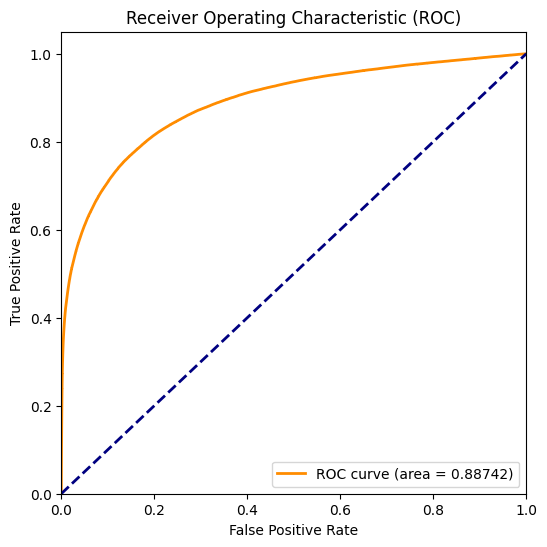


======== Epoch 15 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:54.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28134
  Training epcoh took: 0:11:45

Running Validation...
Confusion Matrix:
[[636318  16477]
 [ 69770  77435]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89219125
Weighted prec

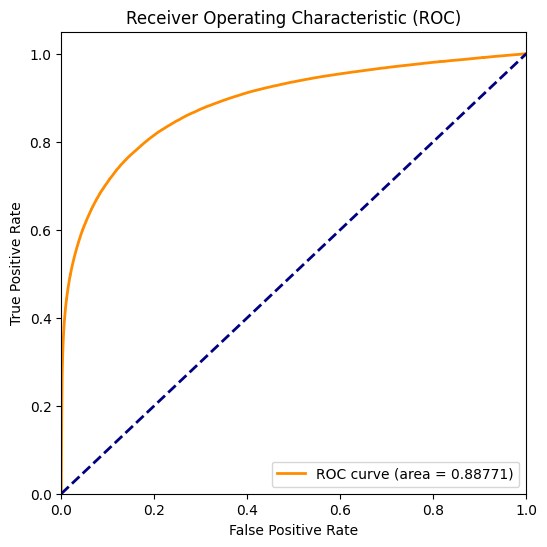


======== Epoch 16 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:21.
  Batch   600  of    924.    Elapsed: 0:07:38.
  Batch   700  of    924.    Elapsed: 0:08:54.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28103
  Training epcoh took: 0:11:45

Running Validation...
Confusion Matrix:
[[629744  23051]
 [ 64056  83149]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94    652795
           1       0.78      0.56      0.66    147205

    accuracy                           0.89    800000
   macro avg       0.85      0.76      0.80    800000
weighted avg       0.88      0.89      0.88    800000

Accuracy score:
0.89111625
Weighted prec

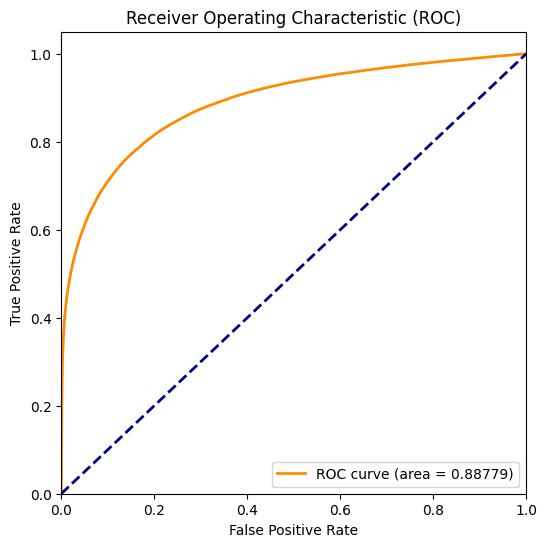


======== Epoch 17 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:16.
  Batch   200  of    924.    Elapsed: 0:02:31.
  Batch   300  of    924.    Elapsed: 0:03:49.
  Batch   400  of    924.    Elapsed: 0:05:05.
  Batch   500  of    924.    Elapsed: 0:06:21.
  Batch   600  of    924.    Elapsed: 0:07:39.
  Batch   700  of    924.    Elapsed: 0:08:54.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:28.

  Average training loss: 0.28048
  Training epcoh took: 0:11:45

Running Validation...
Confusion Matrix:
[[634120  18675]
 [ 67480  79725]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.81      0.54      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.76      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89230625
Weighted prec

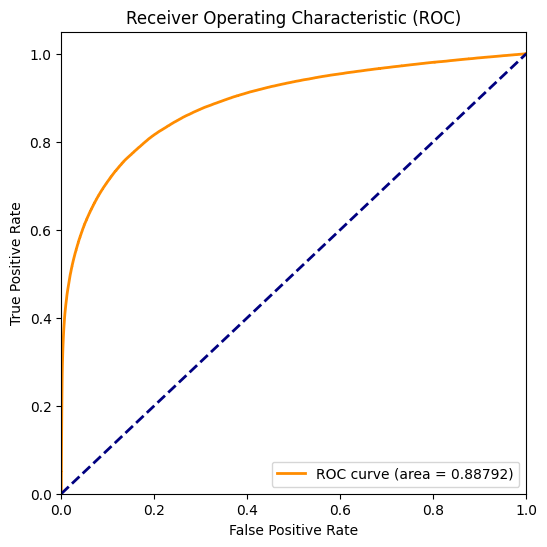


======== Epoch 18 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:52.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:14.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.28003
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[636122  16673]
 [ 69447  77758]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89235
Weighted precisi

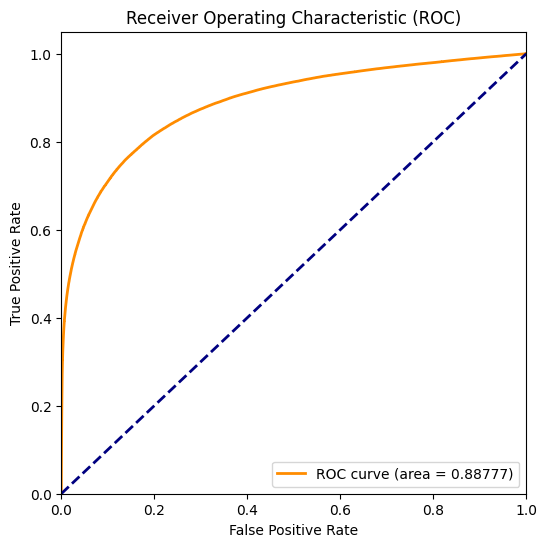


======== Epoch 19 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:52.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.27984
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[636445  16350]
 [ 69583  77622]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.83      0.53      0.64    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.75      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89258375
Weighted prec

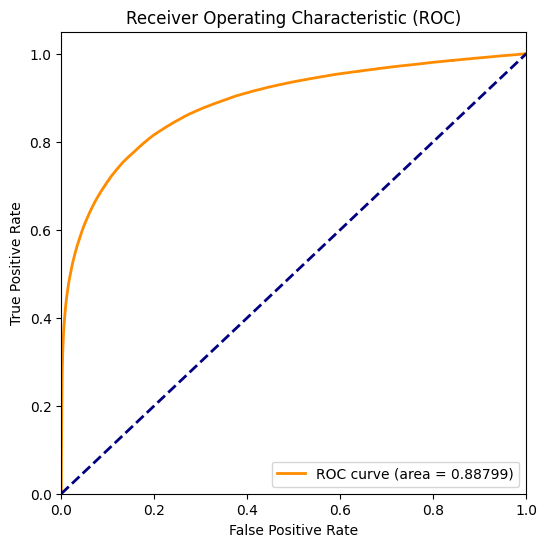


======== Epoch 20 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:52.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.27928
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[634730  18065]
 [ 67974  79231]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.81      0.54      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.76      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89245125
Weighted prec

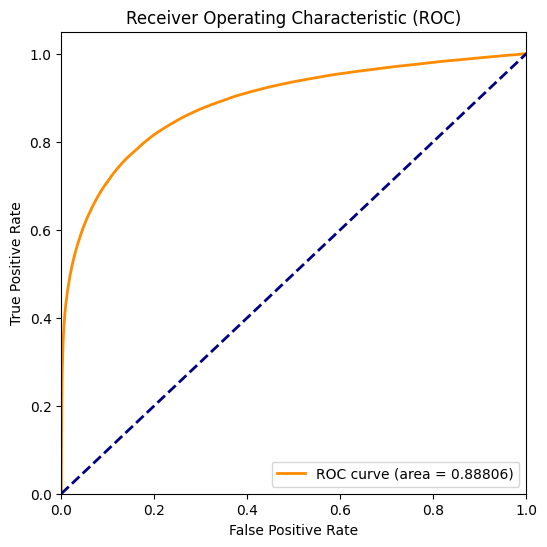


======== Epoch 21 / 21 ========
Training...
  Batch   100  of    924.    Elapsed: 0:01:18.
  Batch   200  of    924.    Elapsed: 0:02:34.
  Batch   300  of    924.    Elapsed: 0:03:52.
  Batch   400  of    924.    Elapsed: 0:05:07.
  Batch   500  of    924.    Elapsed: 0:06:23.
  Batch   600  of    924.    Elapsed: 0:07:41.
  Batch   700  of    924.    Elapsed: 0:08:56.
  Batch   800  of    924.    Elapsed: 0:10:12.
  Batch   900  of    924.    Elapsed: 0:11:30.

  Average training loss: 0.27917
  Training epcoh took: 0:11:47

Running Validation...
Confusion Matrix:
[[634829  17966]
 [ 67985  79220]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    652795
           1       0.82      0.54      0.65    147205

    accuracy                           0.89    800000
   macro avg       0.86      0.76      0.79    800000
weighted avg       0.89      0.89      0.88    800000

Accuracy score:
0.89256125
Weighted prec

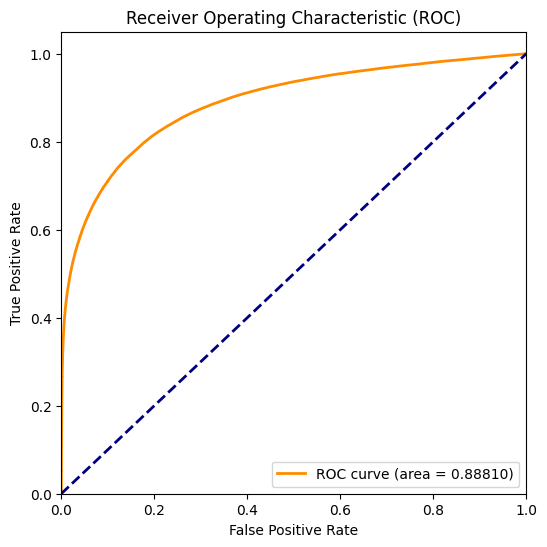


Training complete!


In [ ]:
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
val_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()


    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.5f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Initialize variables for the confusion matrix
    all_preds = []
    all_labels = []
    all_probabilities = []

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

        # Append predictions and labels to calculate the confusion matrix
        all_preds.extend(np.argmax(logits, axis=1))
        all_labels.extend(label_ids)

        # Append probability scores for ROC curve
        probabilities = torch.softmax(torch.from_numpy(logits), dim=1)
        all_probabilities.extend(probabilities[:, 1].cpu().numpy())

    # Calculate the confusion matrix
    confusion = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(confusion)
    print("Classification reporet:")
    print(classification_report(all_labels, all_preds))
    print("Accuracy score:")
    print(accuracy_score(all_labels, all_preds))
    print("Weighted precision_recall_f1score:")
    print(precision_recall_fscore_support(all_labels, all_preds, average = 'weighted'))

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.5f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    val_values.append(eval_accuracy/nb_eval_steps)

    # Calculate ROC AUC score and plot ROC curve
    roc_auc = roc_auc_score(all_labels, all_probabilities)
    fpr, tpr, _ = roc_curve(all_labels, all_probabilities)

    print("ROC AUC Score: {:.5f}".format(roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
print("")
print("Training complete!")

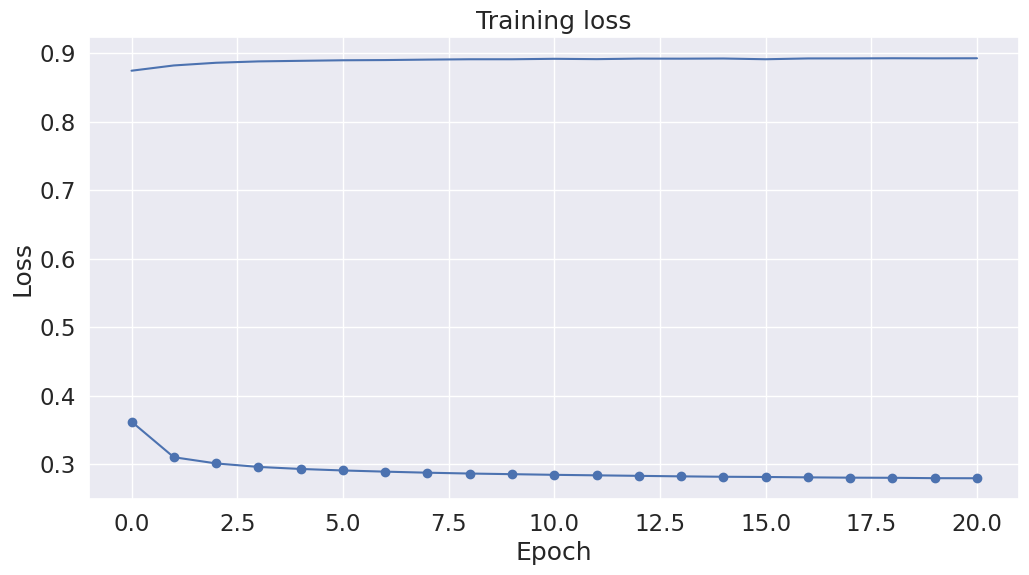

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')
plt.plot(val_values, 'b')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './mixed_model_save_t2/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
#torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./mixed_model_save_t2/


('./mixed_model_save_t2/tokenizer_config.json',
 './mixed_model_save_t2/special_tokens_map.json',
 './mixed_model_save_t2/vocab.txt',
 './mixed_model_save_t2/added_tokens.json')

In [ ]:
!ls -lh ./mixed_model_save_t2/

total 47M
-rw-r--r-- 1 root root  649 Jan 19 05:49 config.json
-rw-r--r-- 1 root root  47M Jan 19 05:49 model.safetensors
-rw-r--r-- 1 root root  125 Jan 19 05:49 special_tokens_map.json
-rw-r--r-- 1 root root 1.6K Jan 19 05:49 tokenizer_config.json
-rw-r--r-- 1 root root 227K Jan 19 05:49 vocab.txt
